In [77]:
# Convert Datasets to Dataframe
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
# Jumlah Missing Data
print('Jumlah Missing Data\n',df.isnull().sum())

Jumlah Missing Data
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [79]:
# Jumlah Data Duplicate
print('Jumlah Data Duplicate\n',df.duplicated().sum())

Jumlah Data Duplicate
 0


In [80]:
# Jumlah Class / Label
print('Jumlah sample class\n',df['Outcome'].value_counts())

Jumlah sample class
 0    500
1    268
Name: Outcome, dtype: int64


In [81]:
# Memisahkan antara atribut/fitur dengan label pada sebuah Datasets
x = df[df.columns[:8]]
y = df["Outcome"]

type(y)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


<AxesSubplot: xlabel='Glucose', ylabel='Insulin'>

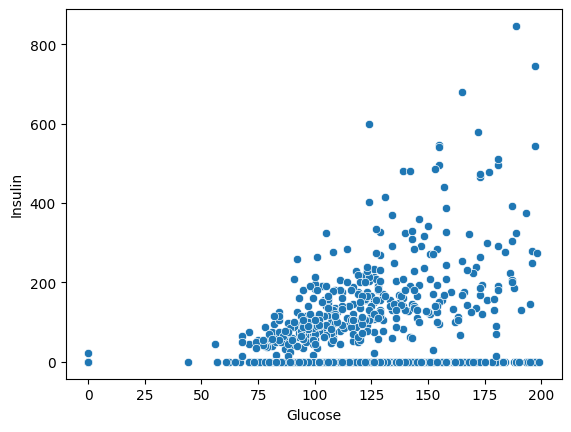

In [82]:
# Scatter Plot before using SMOTE method
import seaborn as sns

sns.scatterplot(x='Glucose',y='Insulin',data=df)

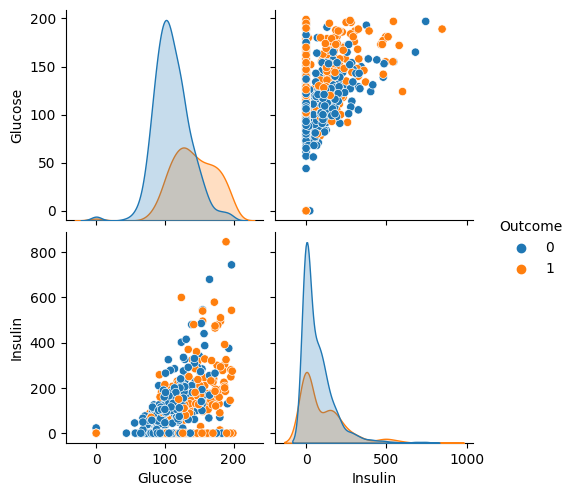

In [83]:
import matplotlib.pyplot as plt

sns.pairplot(data=df,vars=['Glucose', 'Insulin'], hue = 'Outcome')
plt.show()

In [84]:
# Standarisasi Datesets
from sklearn.preprocessing import StandardScaler

# Instance
scaler = StandardScaler()
scaler.fit(x)
scalerdata = scaler.transform(x)
scalerdata = pd.DataFrame(scalerdata, columns=x.columns)
scalerdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [85]:
# Membagi 2 Dataset menjadi Train set dan Test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scalerdata,y,test_size=0.1,random_state=42,shuffle=False)
print(X_train)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
686    -0.250952  0.284975      -0.263941      -1.288212 -0.692891 -1.128639   
687    -0.844885 -0.434859      -0.987710      -0.096379 -0.692891 -0.468659   
688    -0.844885  0.597947       0.253036       0.342717  0.870031 -1.001720   
689    -0.844885  0.723135       0.666618       1.597279  0.870031  1.790503   
690     1.233880 -0.434859       0.563223      -1.288212 -0.692891 -0.938260   

     DiabetesPedigreeFunction       Age

In [86]:
from sklearn.svm import SVC

cls = SVC(kernel='rbf')
cls.fit(X_train,y_train)

SVC()

In [87]:
# ML Model Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = cls.predict(X_test)

print('Accuarcy Score:',round(cls.score(X_test,y_test), 2))
print('Precision Score:',round(precision_score(y_pred,y_test), 2))
print('Recall Score:',round(recall_score(y_pred,y_test), 2))
print('F1 Score:',round(f1_score(y_pred,y_test), 2))


Accuarcy Score: 0.79
Precision Score: 0.58
Recall Score: 0.86
F1 Score: 0.69


In [88]:
# Predict
import numpy as np

patient = np.array([[1.233880, 1.943724, -0.263941, -1.288212, -0.692891, -1.103255, 0.604397, -0.105584]])

if cls.predict(patient) == 1:
    print('Yes')
else:
    print('No')

Yes


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<h1>Implement SMOTE</h1>

In [89]:
from imblearn.over_sampling import SMOTE
df_smote = SMOTE().fit_resample(x, y)

In [90]:
print('Jumlah Data setelah OverSampling\n',df_smote[1].value_counts())

Jumlah Data setelah OverSampling
 1    500
0    500
Name: Outcome, dtype: int64


In [91]:
new_df = pd.DataFrame(df_smote[0], columns=df_smote[0].columns)

In [92]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [93]:
# Memisahkan antara atribut/fitur dengan label pada sebuah Datasets
new_x = new_df
new_y = df_smote[1]

new_y

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

<AxesSubplot: xlabel='Glucose', ylabel='Insulin'>

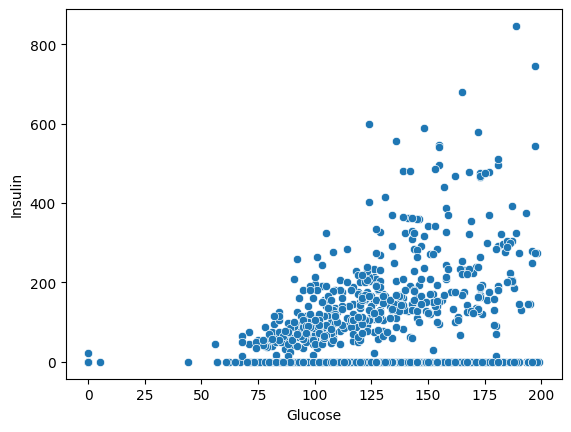

In [94]:
# Scatter Plot after using SMOTE method
import seaborn as sns

sns.scatterplot(x='Glucose',y='Insulin',data=new_df)

In [95]:
# Standarisasi New Datesets

# Instance
scaler.fit(new_x)
scalerNewData = scaler.transform(new_x)
scalerNewData = pd.DataFrame(scalerNewData, columns=new_x.columns)
scalerNewData.head()
scalerNewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [96]:
# Membagi 2 Dataset menjadi Train set dan Test set

X_New_train,X_New_test,y_New_train,y_New_test = train_test_split(scalerNewData,new_y,test_size=0.1,random_state=42,shuffle=False)
print(X_New_train)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.590264  0.674621       0.131355       0.880711 -0.703865  0.139401   
1      -0.913976 -1.229979      -0.178080       0.510820 -0.703865 -0.789851   
2       1.191960  1.732732      -0.281225      -1.276988 -0.703865 -1.227927   
3      -0.913976 -1.109052      -0.178080       0.140929  0.091577 -0.590726   
4      -1.214825  0.342072      -1.518963       0.880711  0.717776  1.400528   
..           ...       ...            ...            ...       ...       ...   
895    -0.011432 -0.564880       0.131355      -0.044017  0.624693 -0.240665   
896    -0.312280  1.218793       0.853369       0.325874 -0.703865  0.142319   
897     1.492808  0.916475       0.853369      -1.276988 -0.703865 -0.947602   
898     1.191960  0.946707       0.543935       0.449171 -0.703865 -0.094302   
899     0.289416  1.944355       0.079783      -1.276988 -0.703865 -0.236103   

     DiabetesPedigreeFunction       Age

In [97]:
# Train ML Model / classifier
new_cls = SVC(kernel='rbf')
new_cls.fit(X_New_train,y_New_train)

SVC()

In [98]:
# New ML Model Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_New_pred = new_cls.predict(X_New_test)

print('Accuarcy Score:',round(new_cls.score(X_New_test,y_New_test), 2))
print('Precision Score:',round(precision_score(y_New_pred,y_New_test), 2))
print('Recall Score:',round(recall_score(y_New_pred,y_New_test), 2))
print('F1 Score:',round(f1_score(y_New_pred,y_New_test), 2))

Accuarcy Score: 0.87
Precision Score: 0.87
Recall Score: 1.0
F1 Score: 0.93


In [99]:
# Predict

new_patient = np.array([[1.233880, 1.943724, -0.263941, -1.288212, -0.692891, -1.103255, 0.604397, -0.105584]])

if new_cls.predict(new_patient) == 1:
    print('Yes')
else:
    print('No')

Yes


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
